![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [78]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [79]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [80]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [81]:
#DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [82]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [83]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [84]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [85]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [86]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [87]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [88]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [90]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
32425,id_1941,Hamburg,"['Japanese', 'Sushi']",1945.0,NaN,13.0,"[[], []]",/Restaurant_Review-g187331-d2546507-Reviews-So...,d2546507,1,4.0
15107,id_7112,Paris,NaN,7113.0,NaN,6.0,[['Authentic Lebanese traditional sandwishes.....,/Restaurant_Review-g187147-d11800802-Reviews-L...,d11800802,1,4.5
24454,id_2460,Rome,"['Italian', 'Mediterranean', 'Vegetarian Frien...",2461.0,$$$$,406.0,"[['Lovely food', 'Great food and ambience but ...",/Restaurant_Review-g187791-d716432-Reviews-Vec...,d716432,1,4.0
45511,id_5902,Paris,['Vietnamese'],5903.0,$$ - $$$,24.0,"[['Fast and tasty...', 'Family lunch'], ['11/1...",/Restaurant_Review-g187147-d3808991-Reviews-Pa...,d3808991,1,4.0
26522,id_5916,Paris,NaN,5917.0,NaN,8.0,"[['New bar, new groovy place!'], ['02/13/2017']]",/Restaurant_Review-g187147-d10772012-Reviews-M...,d10772012,1,5.0


In [91]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [93]:
data.nunique(dropna=False)

Restaurant_id        13094
City                    31
Cuisine Style        10732
Ranking              12975
Price Range              4
Number of Reviews     1574
Reviews              41858
URL_TA               49963
ID_TA                49963
sample                   2
Rating                  10
dtype: int64

In [94]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [95]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [96]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
data['Number of Reviews'].fillna(0, inplace=True)

In [97]:
data['Reviews_isNAN'] = pd.isna(data['Reviews']).astype('uint8')

In [98]:
data['Reviews'].fillna(0, inplace=True)

In [99]:
data['Cuisine Style'].fillna('[unknown]', inplace=True)
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN,Reviews_isNAN
24993,id_1063,Budapest,[unknown],1064.0,NaN,11.0,"[['Good food and cheap', 'Good breakfast, valu...",/Restaurant_Review-g274887-d9857507-Reviews-Pa...,d9857507,1,4.5,0,0
41890,id_1020,Budapest,"['French', 'European', 'Hungarian']",1021.0,NaN,5.0,"[['Gozsdu udvar', 'Gozsdu pancake'], ['11/22/2...",/Restaurant_Review-g274887-d11535916-Reviews-C...,d11535916,1,5.0,0,0
16457,id_775,Helsinki,[unknown],776.0,NaN,9.0,"[['Cool idea , cool location - interesting in....",/Restaurant_Review-g189934-d12150807-Reviews-R...,d12150807,1,3.5,0,0
9330,id_9330,Barcelona,"['European', 'Wine Bar', 'International', 'Med...",3134.0,$$ - $$$,37.0,"[['Holiday night out', 'Can you Spell ""Fantast...",/Restaurant_Review-g187497-d8853377-Reviews-Ra...,d8853377,0,0.0,0,0
10802,id_557,Hamburg,"['Mediterranean', 'European']",558.0,$$ - $$$,46.0,"[['Great food and service', 'Great food, great...",/Restaurant_Review-g187331-d2489872-Reviews-Ce...,d2489872,1,4.0,0,0


In [100]:
data['Price Range'].fillna(0, inplace=True)
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN,Reviews_isNAN
40627,id_11017,Paris,"['Indian', 'Middle Eastern', 'Pakistani']",11019.0,$$ - $$$,26.0,"[[], []]",/Restaurant_Review-g187147-d2716895-Reviews-Le...,d2716895,1,3.5,0,0
9017,id_9017,Madrid,[unknown],3279.0,0,32.0,"[['Devastatingly awful.'], ['03/17/2016']]",/Restaurant_Review-g187514-d9594888-Reviews-Do...,d9594888,0,0.0,0,0
4530,id_4530,Paris,"['French', 'Bar']",13187.0,$$ - $$$,465.0,"[['Paying for location', 'Tipical tourist trap...",/Restaurant_Review-g187147-d2692627-Reviews-Un...,d2692627,0,0.0,0,0
34619,id_2317,Amsterdam,"['European', 'French', 'Dutch', 'Bar', 'Intern...",2323.0,$$ - $$$,28.0,"[['Extremely poor service', 'A great experienc...",/Restaurant_Review-g188590-d8651252-Reviews-Gu...,d8651252,1,4.0,0,0
43535,id_3062,Barcelona,"['Chilean', 'South American']",3063.0,0,11.0,"[['Surprisingly good', 'Lovely little tapas ba...",/Restaurant_Review-g187497-d10220101-Reviews-R...,d10220101,1,4.5,0,0


### 2. Обработка признаков


In [101]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    4
Number of Reviews           1574
Reviews                    41858
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
Reviews_isNAN                  2
dtype: int64

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

# City

In [102]:
data['City'].unique()

array(['Paris', 'Helsinki', 'Edinburgh', 'London', 'Bratislava', 'Lisbon',
       'Budapest', 'Stockholm', 'Rome', 'Milan', 'Munich', 'Hamburg',
       'Prague', 'Vienna', 'Dublin', 'Barcelona', 'Brussels', 'Madrid',
       'Oslo', 'Amsterdam', 'Berlin', 'Lyon', 'Athens', 'Warsaw',
       'Oporto', 'Krakow', 'Copenhagen', 'Luxembourg', 'Zurich', 'Geneva',
       'Ljubljana'], dtype=object)

Количество жителей в городе/столица: Париж - 2,14 млн/да Стокгольм - 0,98 млн да Лондон - 8,98 млн да Берлин - 3,769 да Мюнхен - 1,47 нет Опорто - 0,24 да Милан - 1,35 нет Братислава - 0,4 да Вена - 1,765 да Рим - 2,87 да Барселона - 1,593 нет Мадрид - 3,266 да Дублин - 0,5 да Брюссель - 0,177 да Цюрих - 0,4 нет Варшава - 1,7 да Будапешт - 1,75 да Копенгаген - 1,09 да Амстердам - 0,825 да Лион - 0,496 нет Гамбург - 1,7 нет Лисабон - 0,5 да Прага - 1,27 да Осло - 0,67 да Хельсинки - 0,6 да Эдинбург - 0,43 нет Женева - 0,19 нет Любляна 0,27 да Афины 3,16 да Люксембург - 0,6 да Краков - 0,7 нет

Столица: 1 Не Столица: 0

Города меньше 0,5 млн: 1 города от 1 млн до 2: 2 Города свыше 2 млн: 3

In [103]:
capital = {'Paris':1, 'Stockholm':1, 'London':1, 'Berlin':1, 'Munich':0, 'Oporto':0,
       'Milan':0, 'Bratislava':1, 'Vienna':2, 'Rome':3, 'Barcelona':0, 'Madrid':1,
       'Dublin':1, 'Brussels':1, 'Zurich':0, 'Warsaw':1, 'Budapest':1, 'Copenhagen':1,
       'Amsterdam':1, 'Lyon':0, 'Hamburg':0, 'Lisbon':0, 'Prague':1, 'Oslo':1,
       'Helsinki':1, 'Edinburgh':0, 'Geneva':0, 'Ljubljana':1, 'Athens':1,
       'Luxembourg':1, 'Krakow':0}

data['Capital'] = data.City.apply(lambda x: capital[x])

In [104]:
city_size = {'Paris':3, 'Stockholm':2, 'London':3, 'Berlin':3, 'Munich':2, 'Oporto':1,
       'Milan':2, 'Bratislava':1, 'Vienna':1, 'Rome':1, 'Barcelona':2, 'Madrid':3,
       'Dublin':1, 'Brussels':1, 'Zurich':1, 'Warsaw':2, 'Budapest':2, 'Copenhagen':2,
       'Amsterdam':2, 'Lyon':1, 'Hamburg':2, 'Lisbon':1, 'Prague':2, 'Oslo':2,
       'Helsinki':2, 'Edinburgh':1, 'Geneva':1, 'Ljubljana':1, 'Athens':3,
       'Luxembourg':2, 'Krakow':2}

data['City_size'] = data.City.apply(lambda x: city_size[x])
data.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN,Reviews_isNAN,Capital,City_size
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,0,0,1,3
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,0,0,1,2
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,0,0,0,1
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,0,0,1,3
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,0,0,1,1


In [105]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN,Reviews_isNAN,Capital,City_size
42594,id_3506,Berlin,[unknown],3508.0,0,0.0,"[['Amazing Köftes!'], ['05/23/2017']]",/Restaurant_Review-g187323-d9735838-Reviews-Me...,d9735838,1,5.0,1,0,1,3
10443,id_5139,Berlin,"['International', 'Contemporary', 'Healthy']",5141.0,$,0.0,"[[], []]",/Restaurant_Review-g187323-d12098434-Reviews-D...,d12098434,1,4.0,1,0,1,3
45679,id_1022,Budapest,[unknown],1023.0,0,3.0,"[['Great little Thai takeaway with 6 seats', '...",/Restaurant_Review-g274887-d12843489-Reviews-T...,d12843489,1,5.0,0,0,1,2
20449,id_5552,Milan,[unknown],5555.0,0,0.0,"[[], []]",/Restaurant_Review-g187849-d11677886-Reviews-F...,d11677886,1,3.0,1,0,0,2
1687,id_1687,Madrid,['Gluten Free Options'],3165.0,$,51.0,"[['Sauces for your burger', 'Terrible burger']...",/Restaurant_Review-g187514-d10080943-Reviews-H...,d10080943,0,0.0,0,0,1,3


In [106]:
data['City_name'] = data['City']

In [107]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data = pd.get_dummies(data, columns=[ 'City_name',], dummy_na=True)

In [108]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,City_name_Oporto,City_name_Oslo,City_name_Paris,City_name_Prague,City_name_Rome,City_name_Stockholm,City_name_Vienna,City_name_Warsaw,City_name_Zurich,City_name_nan
20307,id_3446,Paris,"['Wine Bar', 'Vegetarian Friendly']",3447.0,$$ - $$$,37.0,"[['Pizza was WONDERFUL', 'Very good little fin...",/Restaurant_Review-g187147-d10342255-Reviews-M...,d10342255,1,...,0,0,1,0,0,0,0,0,0,0
8293,id_8293,Geneva,['French'],363.0,$$ - $$$,35.0,"[['Great Auberge', 'Ok-ish'], ['04/10/2017', '...",/Restaurant_Review-g188057-d4154380-Reviews-Au...,d4154380,0,...,0,0,0,0,0,0,0,0,0,0
48502,id_5004,London,"['Bar', 'Pub']",5013.0,0,13.0,"[['Excellent food, generous portions and grea....",/Restaurant_Review-g186338-d12303478-Reviews-T...,d12303478,1,...,0,0,0,0,0,0,0,0,0,0
47112,id_2768,Prague,[unknown],2774.0,0,3.0,"[['Inflexible'], ['01/31/2016']]",/Restaurant_Review-g274707-d9796584-Reviews-Co...,d9796584,1,...,0,0,0,1,0,0,0,0,0,0
26028,id_6789,Barcelona,[unknown],6790.0,0,9.0,"[['Not for lunch!!!!', 'Poor service'], ['08/2...",/Restaurant_Review-g187497-d8298774-Reviews-Su...,d8298774,1,...,0,0,0,0,0,0,0,0,0,0


In [109]:
rest_num_id = data.Restaurant_id.value_counts().to_dict()
data['rest_num_id'] = data.Restaurant_id.apply(lambda x: rest_num_id[x])

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Restaurant_id            50000 non-null  object 
 1   City                     50000 non-null  object 
 2   Cuisine Style            50000 non-null  object 
 3   Ranking                  50000 non-null  float64
 4   Price Range              50000 non-null  object 
 5   Number of Reviews        50000 non-null  float64
 6   Reviews                  50000 non-null  object 
 7   URL_TA                   50000 non-null  object 
 8   ID_TA                    50000 non-null  object 
 9   sample                   50000 non-null  int64  
 10  Rating                   50000 non-null  float64
 11  Number_of_Reviews_isNAN  50000 non-null  uint8  
 12  Reviews_isNAN            50000 non-null  uint8  
 13  Capital                  50000 non-null  int64  
 14  City_size             

# Price Range

In [111]:
data['Price Range'].value_counts()

$$ - $$$    23041
0           17361
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [112]:
print(data['Price Range'].unique())
def price_identification(value):
    if value == 0:
        return 0
    elif value == '$':
        return 1
    elif value == '$$ - $$$':
        return 2
    elif value == '$$$$':
        return 3
data['Price Range'] = data['Price Range'].apply(lambda x: price_identification(x))

['$$ - $$$' '$$$$' '$' 0]


In [113]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,City_name_Oslo,City_name_Paris,City_name_Prague,City_name_Rome,City_name_Stockholm,City_name_Vienna,City_name_Warsaw,City_name_Zurich,City_name_nan,rest_num_id
6023,id_6023,Milan,"['Italian', 'Greek', 'Vegetarian Friendly']",5789.0,2,586.0,"[['DO NOT ORDER FROM OR EAT HERE', 'Romantic p...",/Restaurant_Review-g187849-d1391261-Reviews-Ca...,d1391261,0,...,0,0,0,0,0,0,0,0,0,2
17487,id_3215,Berlin,[unknown],3217.0,0,13.0,"[['Cheap and good breakfast!', 'yum!'], ['02/2...",/Restaurant_Review-g187323-d7346381-Reviews-De...,d7346381,1,...,0,0,0,0,0,0,0,0,0,5
2158,id_2158,London,"['Italian', 'Pizza']",10607.0,2,55.0,"[['Good food and charming manager', 'Dissappin...",/Restaurant_Review-g186338-d887297-Reviews-La_...,d887297,0,...,0,0,0,0,0,0,0,0,0,9
12111,id_7859,London,"['Seafood', 'European', 'Wine Bar']",7868.0,2,4.0,[['Excellent fish at reasonable prices with g....,/Restaurant_Review-g186338-d13277746-Reviews-P...,d13277746,1,...,0,0,0,0,0,0,0,0,0,3
31913,id_7196,Madrid,['Mediterranean'],7201.0,0,21.0,"[['Contemporary Cuisine'], ['05/24/2013']]",/Restaurant_Review-g187514-d4059880-Reviews-La...,d4059880,1,...,0,0,0,0,0,0,0,0,0,2


# Reviews

In [114]:
data.Reviews[4]

"[['Always the best in bratislava', 'Very good but pricey'], ['02/08/2018', '01/24/2018']]"

In [115]:
data["Reviews"] = data["Reviews"].str.replace("nan", "' '")
data["Reviews"].fillna("[[], []]", inplace=True)

In [116]:
data.Reviews[6]

'[[], []]'

In [117]:
rx = r'(\d\d/\d\d/\d{4})'

data['reviews_Date'] = data["Reviews"].str.findall(rx).apply(','.join)

In [118]:
new_df = data['reviews_Date'].str.split(',',expand=True)
new_df.columns = ['reviews_Date1','reviews_Date2']
new_df['reviews_Date1'] = pd.to_datetime(new_df['reviews_Date1'], utc=True)
new_df['reviews_Date2'] = pd.to_datetime(new_df['reviews_Date2'], errors='ignore', utc=True)
new_df['reviews_Date2'] = new_df['reviews_Date2'].dt.date
new_df['reviews_Date1'] = new_df['reviews_Date1'].dt.date
new_df['reviews_Date1 - reviews_Date2'] = (new_df['reviews_Date1'] - new_df['reviews_Date2'])

In [119]:
data = pd.concat((data, new_df), axis = 1)
data.drop(['reviews_Date'],axis=1, inplace=True)
data.sample(4)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,City_name_Rome,City_name_Stockholm,City_name_Vienna,City_name_Warsaw,City_name_Zurich,City_name_nan,rest_num_id,reviews_Date1,reviews_Date2,reviews_Date1 - reviews_Date2
6808,id_6808,Athens,"['Mediterranean', 'Greek']",757.0,2,96.0,"[['it was better than we expected', 'Lovely pl...",/Restaurant_Review-g189400-d6529147-Reviews-Di...,d6529147,0,...,0,0,0,0,0,0,3,2017-10-17,2017-08-29,49 days
43072,id_169,Helsinki,"['Japanese', 'Sushi', 'Asian', 'Vegetarian Fri...",170.0,2,160.0,"[['Really good Japanese food', 'Good food, but...",/Restaurant_Review-g189934-d778721-Reviews-Kab...,d778721,1,...,0,0,0,0,0,0,10,2017-08-28,2017-08-18,10 days
29256,id_7504,Madrid,[unknown],7511.0,0,6.0,"[[], []]",/Restaurant_Review-g187514-d7823992-Reviews-El...,d7823992,1,...,0,0,0,0,0,0,3,NaT,NaT,NaT
4636,id_4636,Rome,['Seafood'],4097.0,2,40.0,"[[], []]",/Restaurant_Review-g187791-d8329215-Reviews-Ri...,d8329215,0,...,1,0,0,0,0,0,4,NaT,NaT,NaT


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   Restaurant_id                  50000 non-null  object         
 1   City                           50000 non-null  object         
 2   Cuisine Style                  50000 non-null  object         
 3   Ranking                        50000 non-null  float64        
 4   Price Range                    50000 non-null  int64          
 5   Number of Reviews              50000 non-null  float64        
 6   Reviews                        50000 non-null  object         
 7   URL_TA                         50000 non-null  object         
 8   ID_TA                          50000 non-null  object         
 9   sample                         50000 non-null  int64          
 10  Rating                         50000 non-null  float64        
 11  Nu

# Cuisine Style

In [121]:
data['Cuisine Style'].describe()

count         50000
unique        10732
top       [unknown]
freq          11590
Name: Cuisine Style, dtype: object

In [122]:
data['Cuisine Style'] = data['Cuisine Style'].str.replace('[','')
data['Cuisine Style'] = data['Cuisine Style'].str.replace(']','')
data['Cuisine Style'] = data['Cuisine Style'].str.replace("'",'')
data['Cuisine Style'] = data['Cuisine Style'].str.replace(",",'|')
len(data['Cuisine Style'].values[0].split('|'))

2

In [123]:
def num_1 (x):
    y = 0
    return y
data['couisin_num'] = data.apply(num_1, axis =1)
data['couisin_num'] = data.couisin_num.apply(lambda x: len(data['Cuisine Style'][x].split('|')))
data['couisin_num'][0]
data.sample()

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,City_name_Stockholm,City_name_Vienna,City_name_Warsaw,City_name_Zurich,City_name_nan,rest_num_id,reviews_Date1,reviews_Date2,reviews_Date1 - reviews_Date2,couisin_num
23151,id_7874,Paris,unknown,7875.0,0,19.0,"[['We went in for the beef and very pleased.',...",/Restaurant_Review-g187147-d10805608-Reviews-C...,d10805608,1,...,0,0,0,0,0,3,2017-11-23,2016-10-08,411 days,2


# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

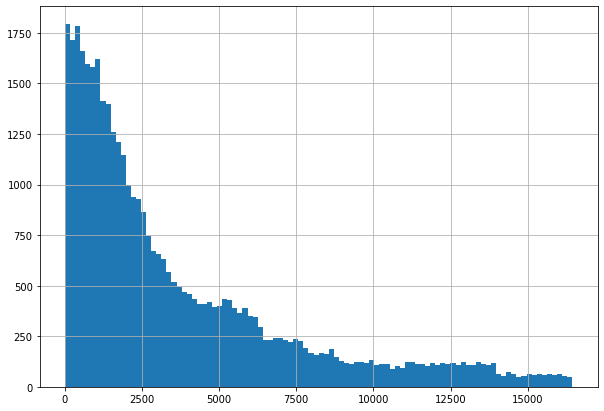

In [124]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

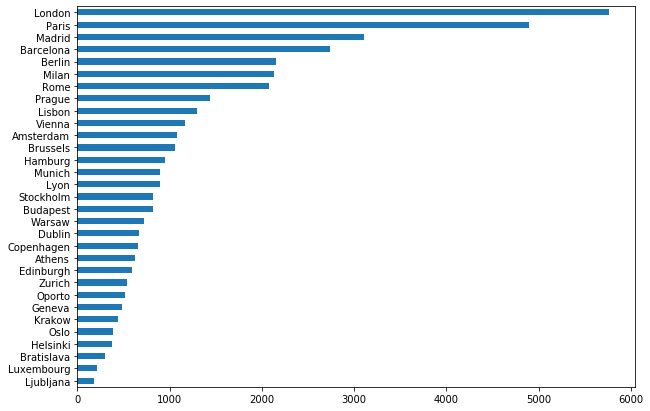

In [125]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

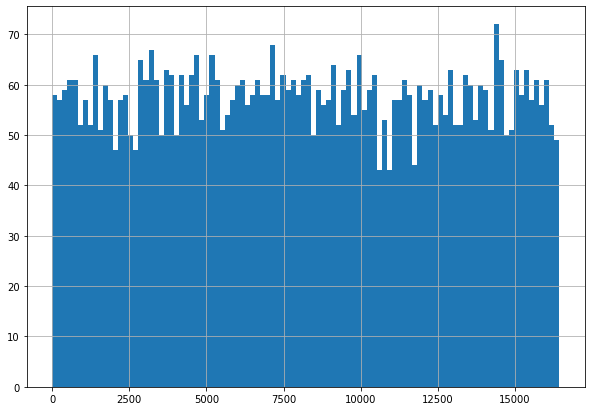

In [126]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

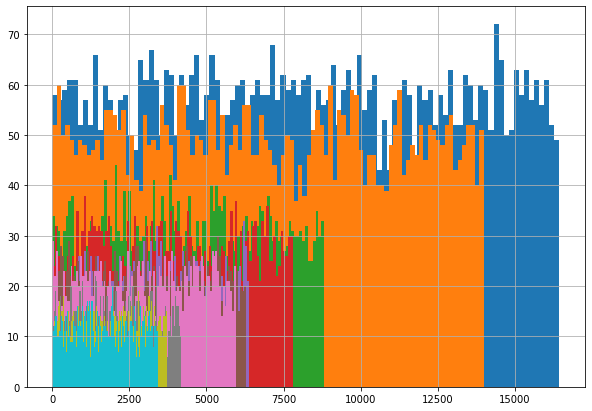

In [127]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

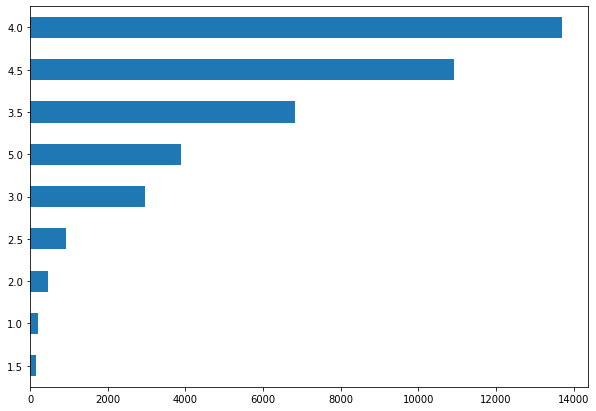

In [128]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

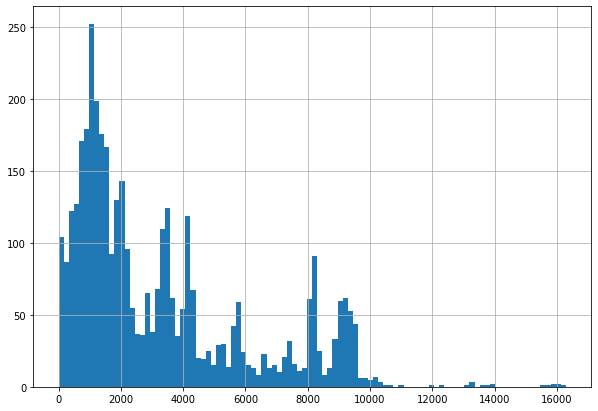

In [129]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

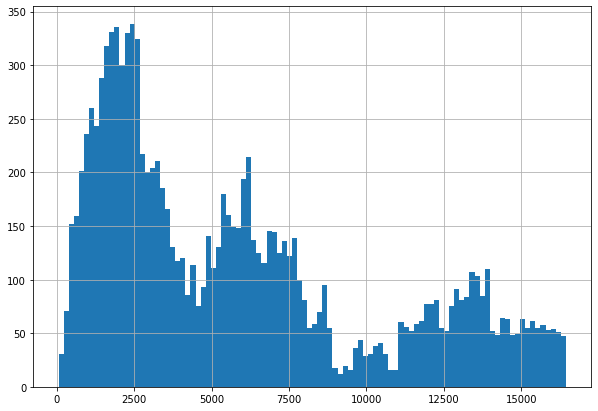

In [130]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

In [131]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
 10  sample             40000 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 3.4+ MB


### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

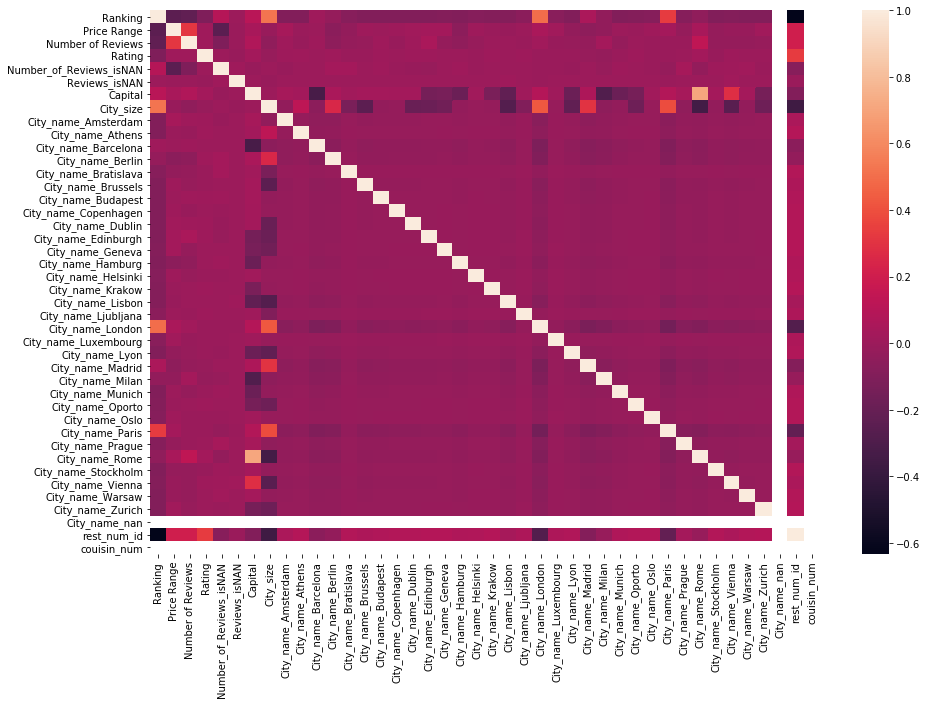

In [132]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)


In [133]:
data1 = data.drop(['sample'], axis=1)
data1.corr().Rating

Ranking                   -0.109897
Price Range                0.015052
Number of Reviews          0.011006
Rating                     1.000000
Number_of_Reviews_isNAN   -0.000631
Reviews_isNAN             -0.011847
Capital                    0.025165
City_size                 -0.016787
City_name_Amsterdam        0.007447
City_name_Athens           0.016852
City_name_Barcelona       -0.000703
City_name_Berlin           0.012834
City_name_Bratislava      -0.002550
City_name_Brussels        -0.003957
City_name_Budapest         0.006301
City_name_Copenhagen       0.000948
City_name_Dublin           0.005758
City_name_Edinburgh        0.005484
City_name_Geneva           0.002312
City_name_Hamburg          0.002112
City_name_Helsinki        -0.004032
City_name_Krakow           0.007538
City_name_Lisbon          -0.000081
City_name_Ljubljana        0.007644
City_name_London          -0.006952
City_name_Luxembourg      -0.002940
City_name_Lyon            -0.005922
City_name_Madrid          -0

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [134]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [135]:
def price_identification(value):
        if value == 0:
            return 0
        elif value == '$':
            return 1
        elif value == '$$ - $$$':
            return 2
        elif value == '$$$$':
            return 3
def num_1 (x):
        y = 0
        return y

In [136]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    df_output.drop(['ID_TA',], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    df_output['Number of Reviews'].fillna(0, inplace=True)
    df_output['Reviews'].fillna(0, inplace=True)
    
    df_output['Price Range'].fillna(0, inplace=True)
    # тут ваш код по обработке NAN
    # ....
    
    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    df_output['City_name'] = df_output['City']
    df_output = pd.get_dummies(df_output, columns=[ 'City_name',], dummy_na=True)
    
    
    
    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    capital = {'Paris':1, 'Stockholm':1, 'London':1, 'Berlin':1, 'Munich':0, 'Oporto':0,
       'Milan':0, 'Bratislava':1, 'Vienna':2, 'Rome':3, 'Barcelona':0, 'Madrid':1,
       'Dublin':1, 'Brussels':1, 'Zurich':0, 'Warsaw':1, 'Budapest':1, 'Copenhagen':1,
       'Amsterdam':1, 'Lyon':0, 'Hamburg':0, 'Lisbon':0, 'Prague':1, 'Oslo':1,
       'Helsinki':1, 'Edinburgh':0, 'Geneva':0, 'Ljubljana':1, 'Athens':1,
       'Luxembourg':1, 'Krakow':0}

    df_output['Capital'] = df_output.City.apply(lambda x: capital[x])
    
    city_size = {'Paris':3, 'Stockholm':2, 'London':3, 'Berlin':3, 'Munich':2, 'Oporto':1,
       'Milan':2, 'Bratislava':1, 'Vienna':1, 'Rome':1, 'Barcelona':2, 'Madrid':3,
       'Dublin':1, 'Brussels':1, 'Zurich':1, 'Warsaw':2, 'Budapest':2, 'Copenhagen':2,
       'Amsterdam':2, 'Lyon':1, 'Hamburg':2, 'Lisbon':1, 'Prague':2, 'Oslo':2,
       'Helsinki':2, 'Edinburgh':1, 'Geneva':1, 'Ljubljana':1, 'Athens':3,
       'Luxembourg':2, 'Krakow':2}

    df_output['City_size'] = data.City.apply(lambda x: city_size[x])
    
    rest_num_id = df_output.Restaurant_id.value_counts().to_dict()
    df_output['rest_num_id'] = df_output.Restaurant_id.apply(lambda x: rest_num_id[x])
    df_output['Price Range'] = df_output['Price Range'].apply(lambda x: price_identification(x))
    
        
    df_output['Cuisine Style'] = df_output['Cuisine Style'].str.replace('[','')
    df_output['Cuisine Style'] = df_output['Cuisine Style'].str.replace(']','')
    df_output['Cuisine Style'] = df_output['Cuisine Style'].str.replace("'",'')
    df_output['Cuisine Style'] = df_output['Cuisine Style'].str.replace(",",'|')
   
       
    df_output['couisin_num'] = df_output.apply(num_1, axis =1)
    df_output['couisin_num'] = df_output.couisin_num.apply(lambda x: len(df_output['Cuisine Style'][x].split('|')))
    df_output['couisin_num']
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
   
    return df_output

In [137]:
df_preproc = preproc_data(data)

In [138]:

df_preproc.sample(10)

,Ranking,Price Range,Number of Reviews,sample,Rating,City_name_Amsterdam,City_name_Athens,City_name_Barcelona,City_name_Berlin,City_name_Bratislava,...,City_name_Rome,City_name_Stockholm,City_name_Vienna,City_name_Warsaw,City_name_Zurich,City_name_nan,Capital,City_size,rest_num_id,couisin_num
1866,6522.0,2,311.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,3,7,2
10720,538.0,2,515.0,1,4.0,0,0,0,0,0,...,0,0,0,0,0,0,1,3,14,2
31336,9259.0,0,0.0,1,5.0,0,0,0,0,0,...,0,0,0,0,0,0,1,3,2,2
35997,10808.0,1,37.0,1,3.5,0,0,0,0,0,...,0,0,0,0,0,0,1,3,2,2
24091,1708.0,1,8.0,1,4.5,0,0,0,0,0,...,0,0,0,0,0,0,1,2,10,2
23213,1990.0,0,3.0,1,3.5,0,0,0,0,0,...,0,1,0,0,0,0,1,2,7,2
36620,8617.0,2,5.0,1,4.5,0,0,0,0,0,...,0,0,0,0,0,0,1,3,3,2
48015,2112.0,0,3.0,1,4.5,0,0,0,0,0,...,0,0,1,0,0,0,2,1,8,2
44504,12745.0,0,3.0,1,3.0,0,0,0,0,0,...,0,0,0,0,0,0,1,3,1,2
1841,840.0,2,17.0,0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,12,2


In [139]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ranking               50000 non-null  float64
 1   Price Range           50000 non-null  int64  
 2   Number of Reviews     50000 non-null  float64
 3   sample                50000 non-null  int64  
 4   Rating                50000 non-null  float64
 5   City_name_Amsterdam   50000 non-null  uint8  
 6   City_name_Athens      50000 non-null  uint8  
 7   City_name_Barcelona   50000 non-null  uint8  
 8   City_name_Berlin      50000 non-null  uint8  
 9   City_name_Bratislava  50000 non-null  uint8  
 10  City_name_Brussels    50000 non-null  uint8  
 11  City_name_Budapest    50000 non-null  uint8  
 12  City_name_Copenhagen  50000 non-null  uint8  
 13  City_name_Dublin      50000 non-null  uint8  
 14  City_name_Edinburgh   50000 non-null  uint8  
 15  City_name_Geneva   

In [140]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [141]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [142]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 40), (40000, 40), (40000, 39), (32000, 39), (8000, 39))

# Model 
Сам ML

In [143]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [144]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [145]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [146]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.21087499999999998


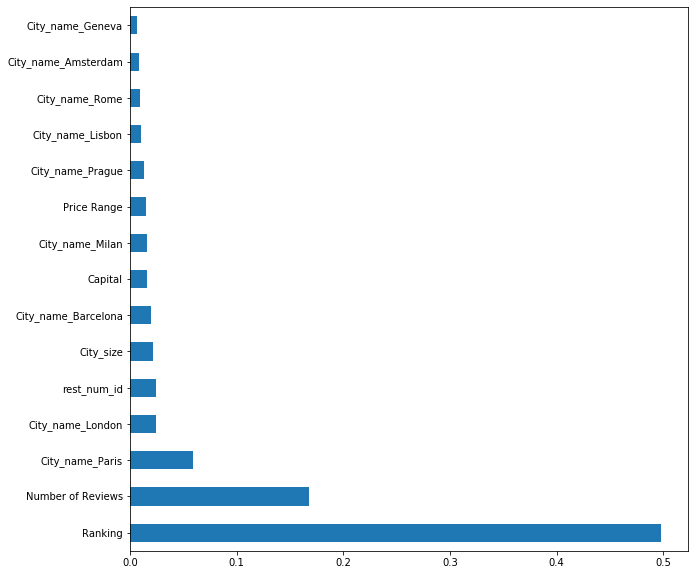

In [147]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [148]:
test_data.sample(10)

,Ranking,Price Range,Number of Reviews,Rating,City_name_Amsterdam,City_name_Athens,City_name_Barcelona,City_name_Berlin,City_name_Bratislava,City_name_Brussels,...,City_name_Rome,City_name_Stockholm,City_name_Vienna,City_name_Warsaw,City_name_Zurich,City_name_nan,Capital,City_size,rest_num_id,couisin_num
3608,13539.0,0,5.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3,4,2
2669,439.0,2,37.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,2
6139,454.0,2,886.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2,2,2
3925,470.0,2,48.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,4,2
2321,1416.0,1,10.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,7,2
3897,2108.0,0,5.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,5,2
1876,3666.0,2,5.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2,8,2
2214,1510.0,0,2.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,7,2
2617,1195.0,2,112.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,7,2
3067,2378.0,0,24.0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,2,3,2


In [149]:
test_data = test_data.drop(['Rating'], axis=1)

In [150]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [151]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [152]:
predict_submission

array([3.13 , 4.31 , 4.515, ..., 3.02 , 4.485, 4.215])

In [153]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.130
1,id_1,4.310
2,id_2,4.515
3,id_3,4.160
4,id_4,4.480
5,id_5,4.600
6,id_6,2.275
7,id_7,3.160
8,id_8,4.140
9,id_9,4.810


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
